# Importando pacotes e base

In [64]:
#importando pacotes
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)

#pre processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE


#modelos e métricas
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score




In [2]:
#importando a base
df = pd.read_csv("F:/4intelligence/case_2/dados/UCI_Credit_Card.csv")


# Limpeza básica

Nesse passo iremos ter um primeio panorama do datase, checar por dados ausentes, colunas duplicadas e possíveis erros de digitação.

In [3]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape


(30000, 25)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.duplicated().sum()


0

In [7]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<Axes: >

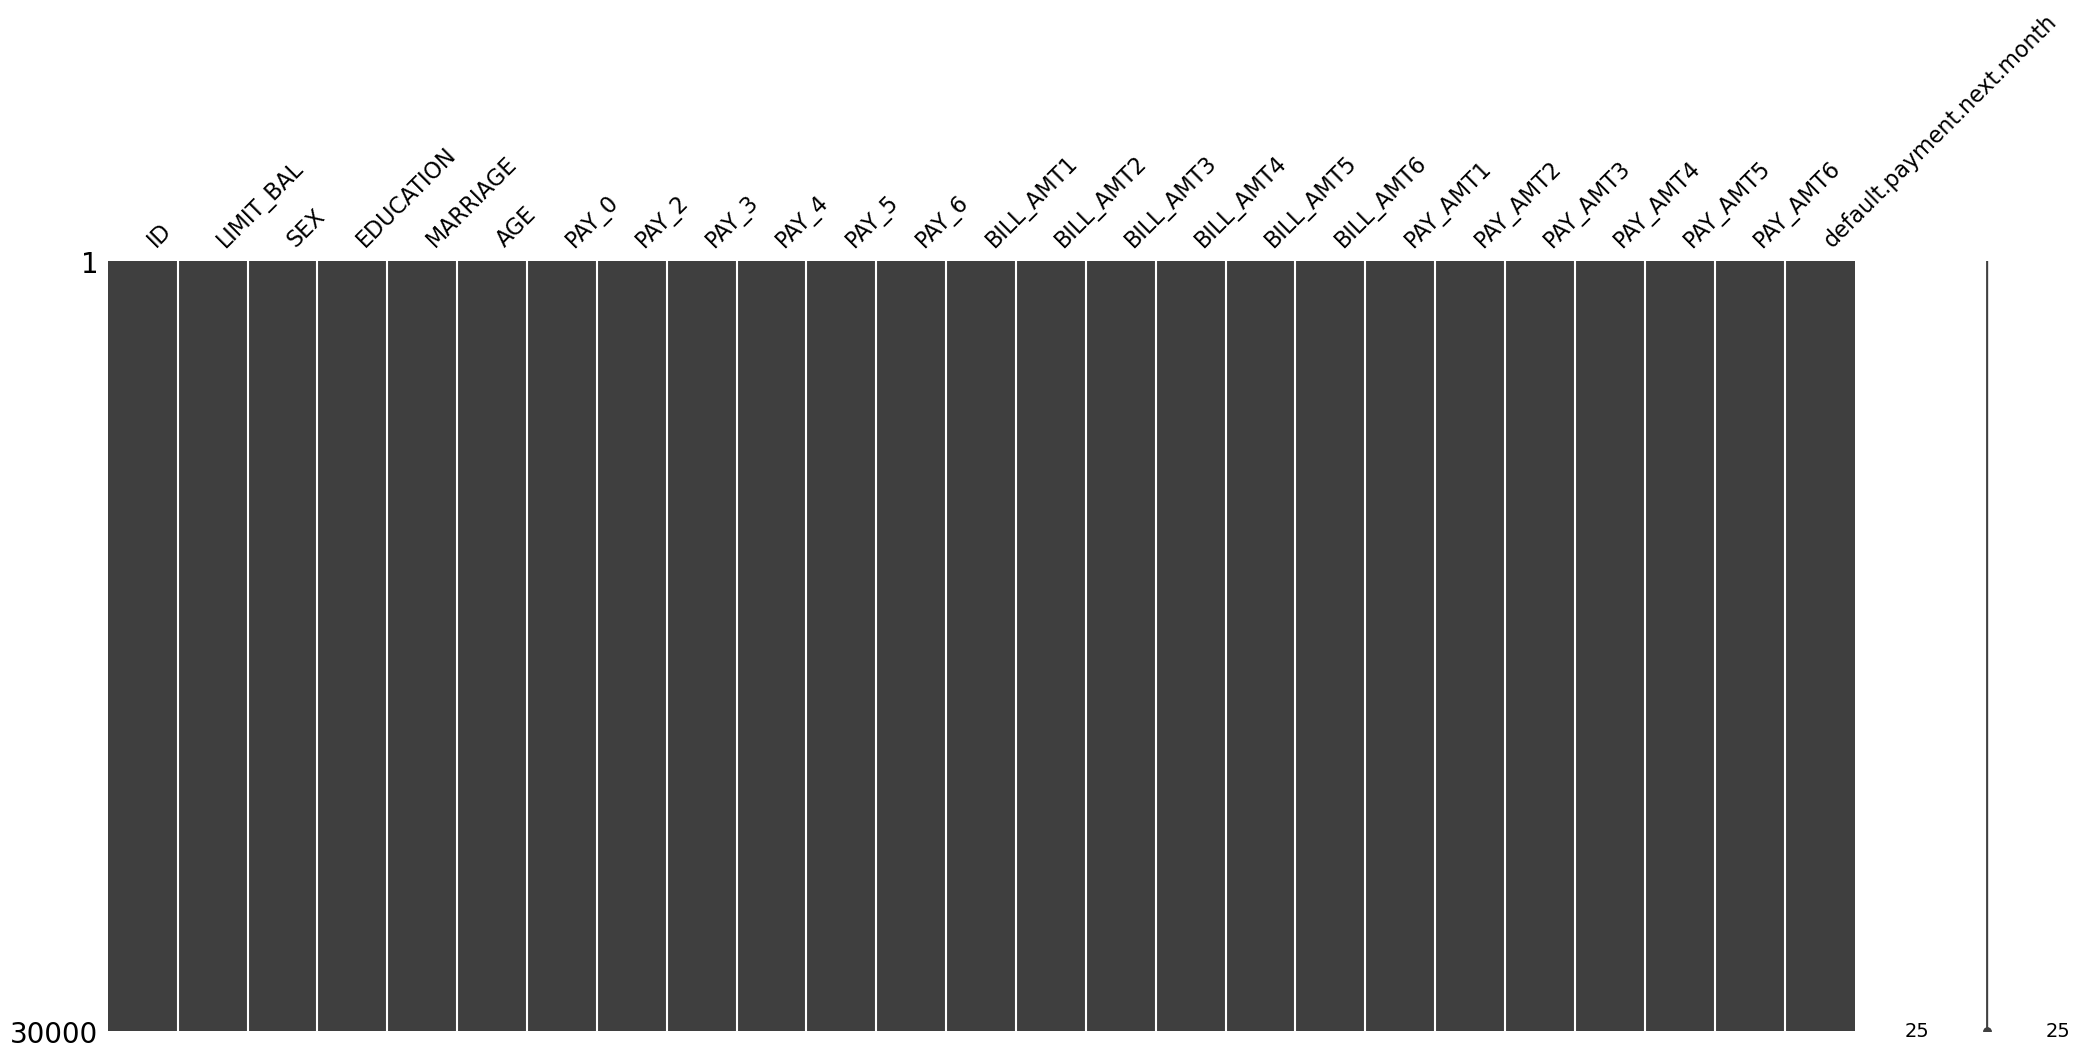

In [8]:
msno.matrix(df)


Em um primeiro momento, não parece haver dados duplicados ou problemas com dados ausentes.


In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Pela tabela de descrição, é possível perceber alguns valores estranhos no dataset:

- As variáveis categóricas contém valores não listados no dicionário. `EDUCATION` e `MARRIAGE` tem valores mínimos de 0, entretanto a ordem númerica no dicionário inicia por 1.
- `PAY_0` e variantes também contém mínimo de -2, embora o dicionário inicia-se com -1 e não tenha valores registrados dentro do rótulo -2.
- `BILL_AMT1` e variantes tem valores negativos como mínimo. Isso poderia ser interpretado como dívidas? Não está claro e deve ser investigado.

A coluna `ID` não tem valor explicativo, irei eliminá-la do dataset:


In [11]:
df = df.drop(columns=['ID'])

In [12]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


# Análise exploratória de dados

Tendo um panorama inicial do dataset nas etapas anteriores, podemos entender melhor como o dataset se comporta ao fazermos um estudo mais detalhado.
Nessa etapa, verificamos através da análise gráfica a distribuição das variáveis categóricas e quantitativas e se há valores discrepantes. Além disso, observammos como nossa variável de interesse [`default.payment.next.month`] se comporta. Faremos uma análise univariada e uma bivariada.

## Outliers

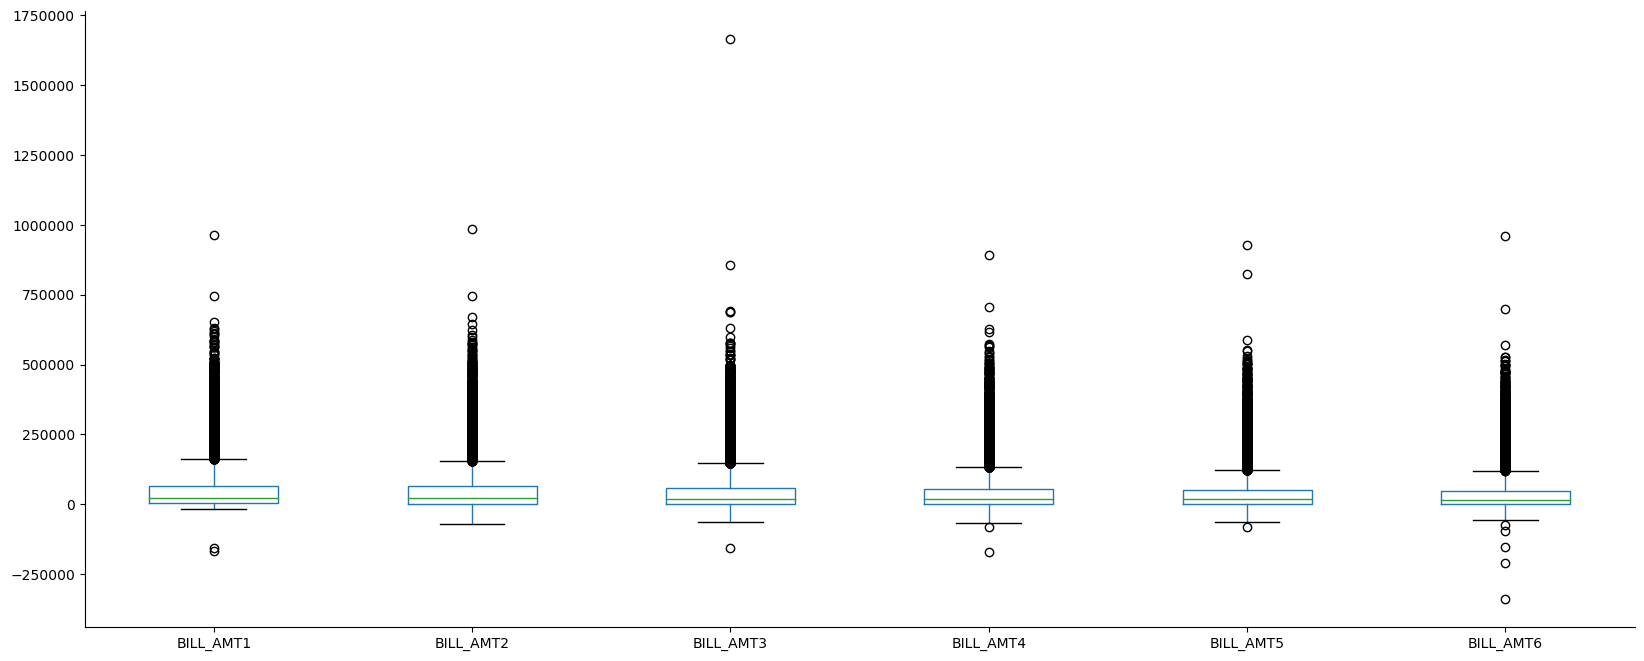

In [13]:
df.boxplot(column=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], grid= False, figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


- Há alguns valores de outliers, principalmente na variável `BILL_AMT3`, onde podemos ver que o valor máximo da distribuição é um outlier.

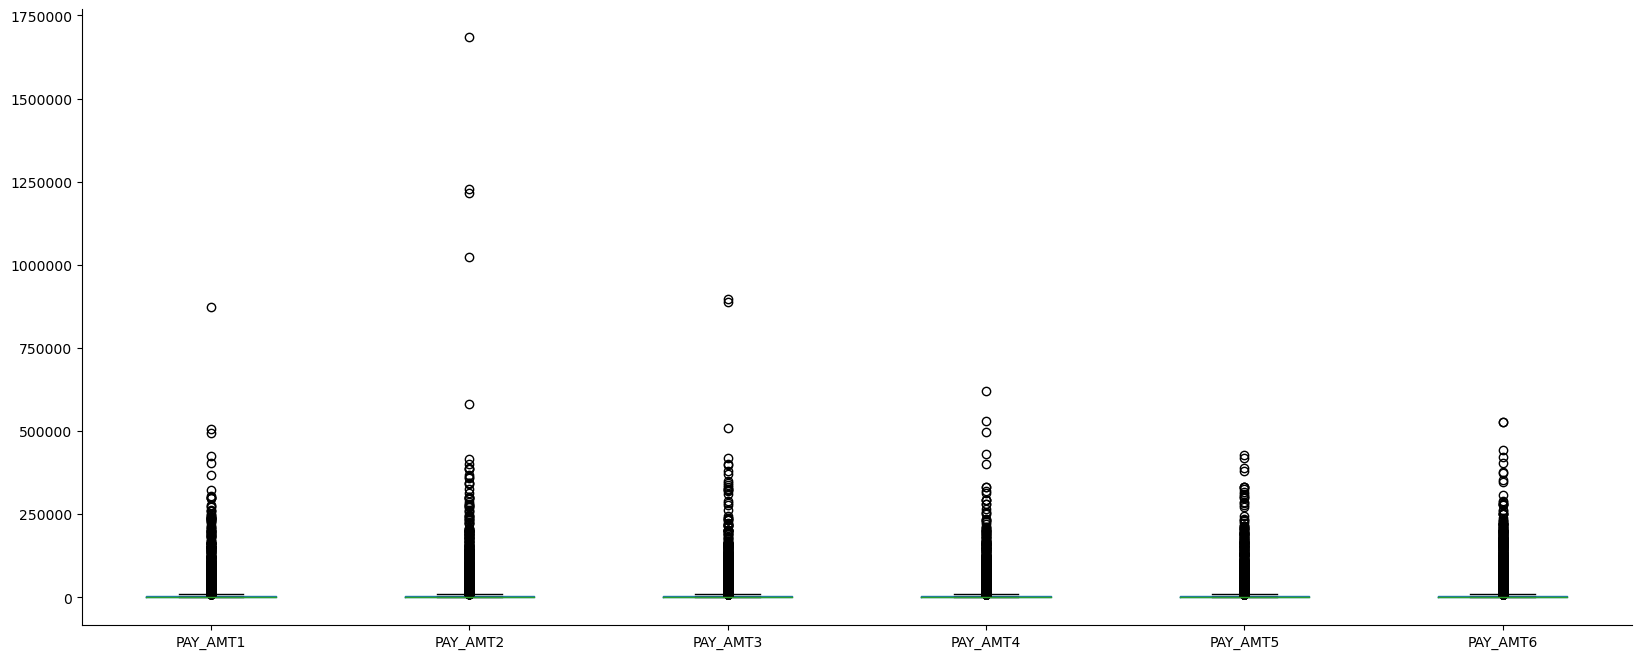

In [14]:
df.boxplot(column=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], grid= False, figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

- Também há outliers, principalmente quando há valores acima de 75000.

## Variável target: default



In [15]:
# Funções de configuraçãos dos gráficos

def configure_barh_chart(chart, title):
    # Configura o título do gráfico
    plt.title(title, size=16, weight='bold', alpha=0.8)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tick_params(bottom = False, left = False)

    # Configura os rótulos nas barras (caso seja um gráfico de barras)
    if isinstance(chart, plt.Axes):
        rects = chart.patches
        for rect in rects:
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2
            space = -60
            ha = 'left'
            if x_value < 0:
                space *= -1
                ha = 'right'
            label = "{:.0f}".format(x_value)

            plt.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords="offset points",
                va='center',
                ha=ha,
                color='white',
                weight='bold',
                size=14)

    # Exibe o gráfico
    plt.show()


# gráfico barras horizontal
def configure_bar_chart(chart, title, legend=True):
    # Configura o título do gráfico
    plt.title(title, size=14, alpha=0.8, weight='bold', pad=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tick_params(bottom=False, left=False)
    plt.yticks([])
    
    # Adiciona a legenda se o argumento legend for True
    if legend:
        plt.legend(loc='upper right', frameon=False, fontsize=10)

    # Configura rótulos nas barras
    if isinstance(chart, plt.Axes):
        for rect in chart.patches:
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2

            space = 1.5
            va = 'bottom'

            if y_value < 0:
                space *= 1
                va = 'top'

            label = "{:.0f}".format(y_value)
            chart.annotate(
                label,
                (x_value, y_value),
                xytext=(0, space),
                textcoords="offset points",
                ha='center',
                va=va,
                color='black',
                size=12,
                weight='bold')

    # Exibe o gráfico
    plt.show()

#histograma com kde
def plot_histogram_kde(data, title, xlabel, ylabel, color):
    with plt.style.context('ggplot'):
        plt.figure(figsize=(10, 6))
        sns.histplot(data, kde=True, color=color)
        plt.ticklabel_format(style='plain', axis='x')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(False)
        plt.show()


Renomeei a coluna `default.payment.next.month` para `is_default`.

In [16]:
df = df.rename(columns = {'default.payment.next.month': 'is_default'})

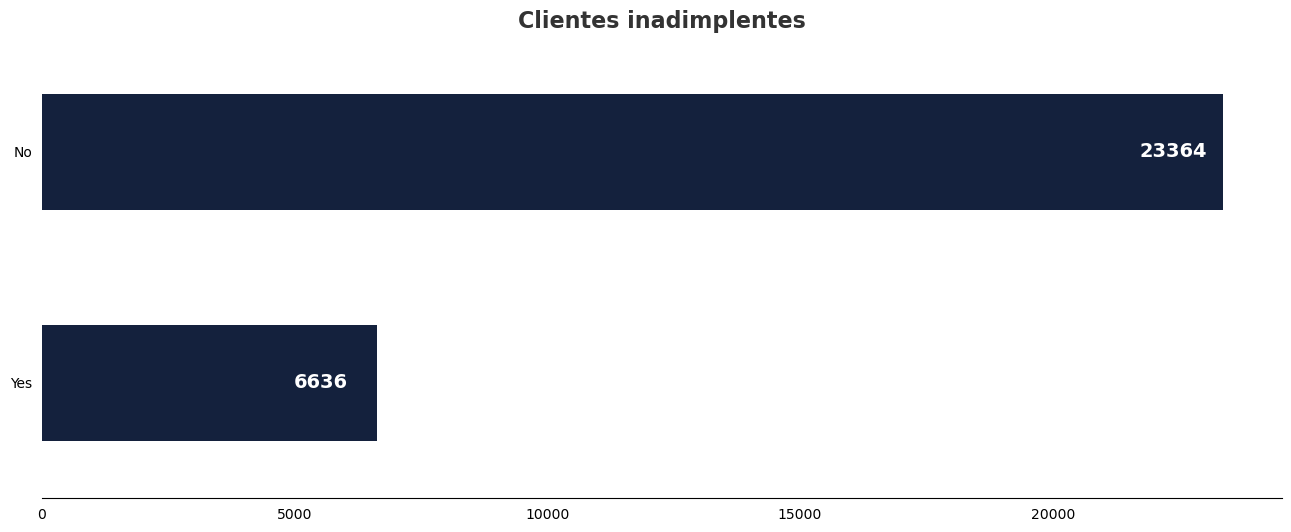

In [17]:
# Mapeia os rótulos desejados para os valores binários
label_mapping_default = {0: 'No', 1: 'Yes'}
#Gráfico
default_grph = (df['is_default'].map(label_mapping_default).value_counts()
                .sort_values(ascending=True)
                .plot(kind='barh', color='#14213d', xlabel='',figsize=(16, 6), align='center',  grid= False))
configure_barh_chart(default_grph, 'Clientes inadimplentes') 


- Há mais clientes que pagaram o cartão de crédito do que aqueles que não, vemos que temos classes desbalanceadas. Será necessário utilizar técnincas de resampling.

In [18]:
print(f'A probabilidade de inadimplência é: {df.is_default.sum() / len(df.is_default)}')


A probabilidade de inadimplência é: 0.2212


## Variáveis categóricas

Vamos olhar a distribuição das variáveis categóricas. Temos como variáveis categóricas 

- SEX
- EDUCATION
- MARRIAGE

In [19]:
#renomeando os títulos para melhor vizualização dos gráficos
df['SEX'] = df['SEX'].replace({1:'Male',2: 'Female'})
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate', 2: 'University', 3: 'High School',  4: 'Other', 5: 'Unknown', 6: 'Unknown'})
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'Married', 2: 'Single', 3: 'Other'})

In [20]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,is_default
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


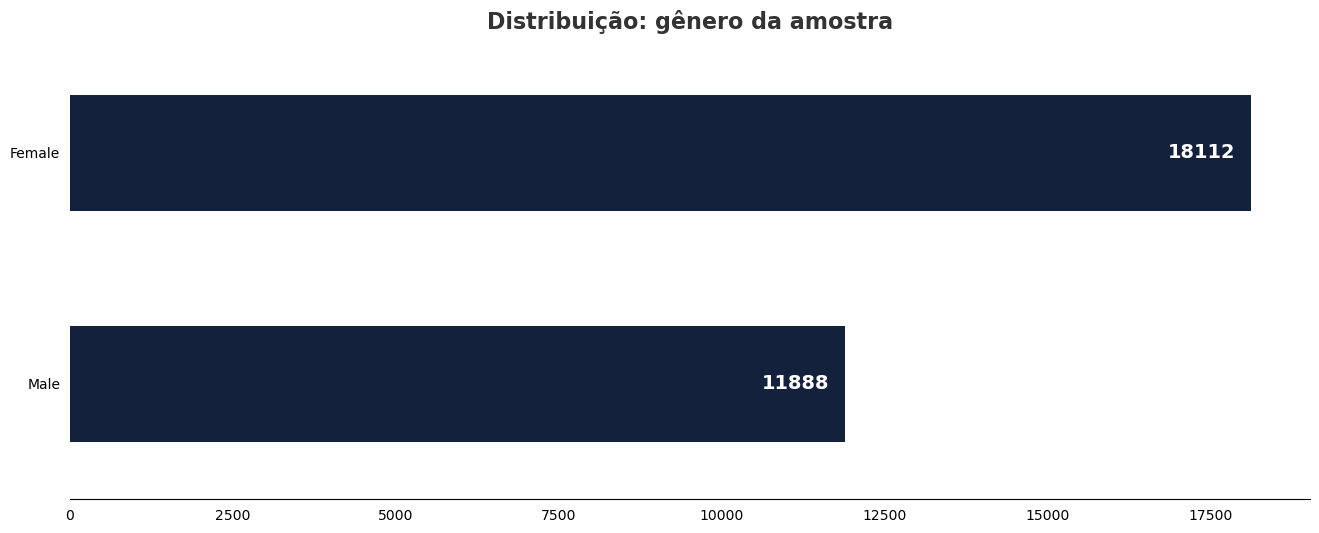

In [21]:
sex_grph = (df['SEX'].value_counts()
                .sort_values(ascending=True)
                .plot(kind='barh', color='#14213d', xlabel='',figsize=(16, 6), align='center',  grid= False))
configure_barh_chart(sex_grph, 'Distribuição: gênero da amostra')

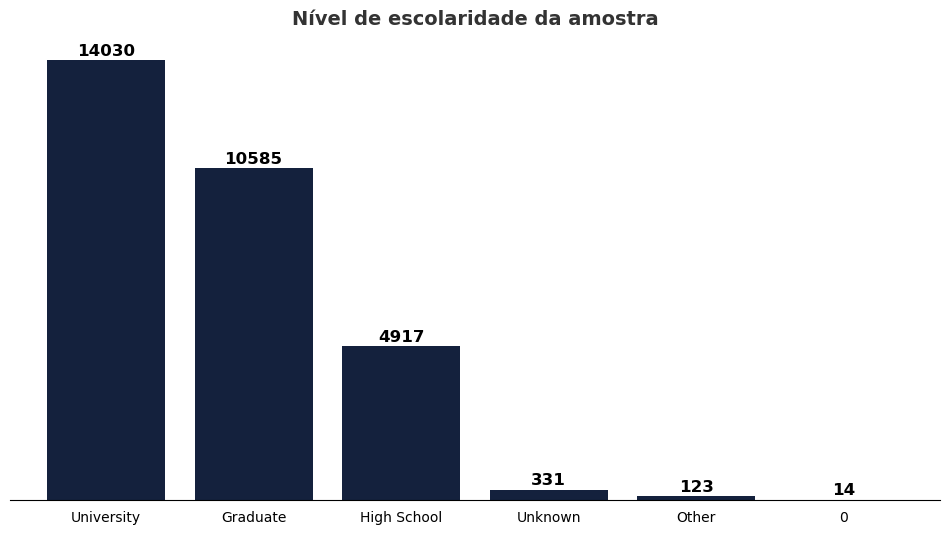

In [22]:
education_gph = (df['EDUCATION'].value_counts()
                                .plot(kind= 'bar', rot= 0, color='#14213d', grid= False, width = 0.8, figsize=(12, 6)))
configure_bar_chart(education_gph,'Nível de escolaridade da amostra', legend = False)



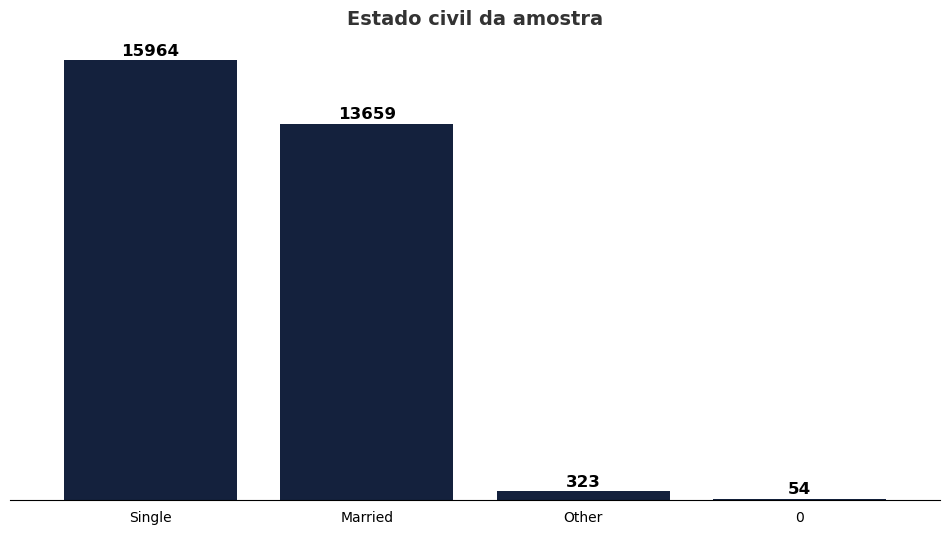

In [23]:
marriage_gph = (df['MARRIAGE'].value_counts()
                                .plot(kind= 'bar', rot= 0, color='#14213d', grid= False, width = 0.8, figsize=(12, 6)))
configure_bar_chart(marriage_gph,'Estado civil da amostra', legend = False)

Temos alguns valores codificados como 0 para corrigir, feita a análise da distribuição das variáveis categóricas univariada, vemos a bivariada em relação à inadimplência:

In [24]:
#criando as crosstabs para os plots

# Criando tabelas de contingência
sex_crstab = pd.crosstab(df['SEX'], df['is_default'].map(label_mapping_default))
educ_crstab = pd.crosstab(df['EDUCATION'], df['is_default'].map(label_mapping_default))
marriage_crstab = pd.crosstab(df['MARRIAGE'], df['is_default'].map(label_mapping_default))

print('Gênero crosstab')
print(sex_crstab)
print('-' * 25)
print('Educação crosstab')
print(educ_crstab)
print('-' * 25)
print('Estado Civil crosstab')
print(marriage_crstab)

Gênero crosstab
is_default     No   Yes
SEX                    
Female      14349  3763
Male         9015  2873
-------------------------
Educação crosstab
is_default      No   Yes
EDUCATION               
0               14     0
Graduate      8549  2036
High School   3680  1237
Other          116     7
University   10700  3330
Unknown        305    26
-------------------------
Estado Civil crosstab
is_default     No   Yes
MARRIAGE               
0              49     5
Married     10453  3206
Other         239    84
Single      12623  3341


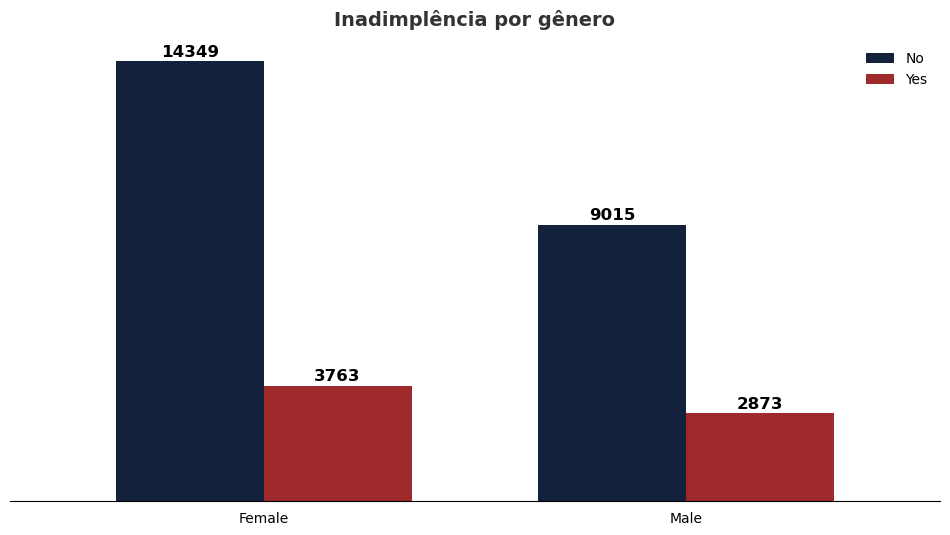

In [25]:
sex_crstab_plt = sex_crstab.plot(kind='bar', rot = 0, grid=False, width = 0.7, xlabel = '', color = ['#14213d', '#9e2a2b'],  figsize=(12, 6))
configure_bar_chart(sex_crstab_plt,'Inadimplência por gênero')

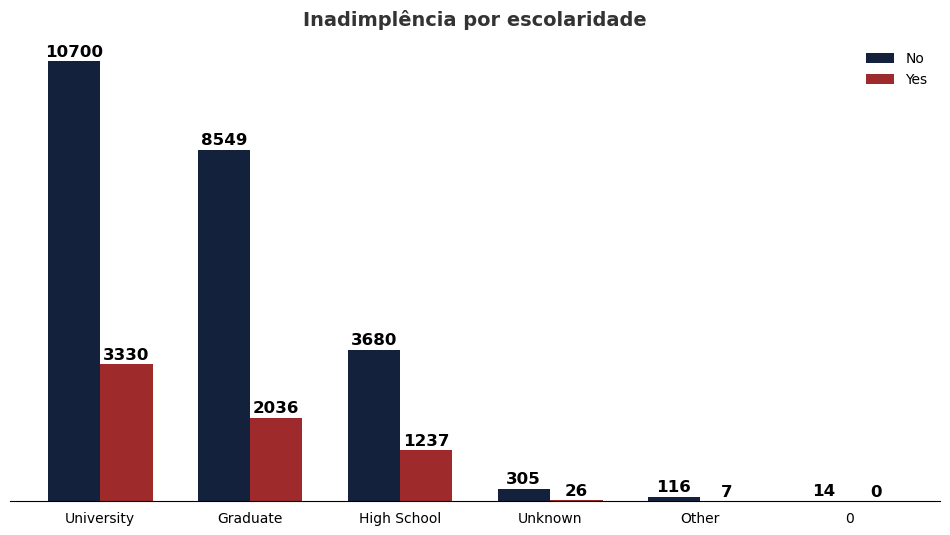

In [26]:
educ_crstab_plt = (educ_crstab.sort_values(['No'], ascending = False)
                              .plot(kind='bar', rot = 0, grid=False, width = 0.7, xlabel = '', color = ['#14213d', '#9e2a2b'], figsize=(12, 6)))
configure_bar_chart(educ_crstab_plt,'Inadimplência por escolaridade')


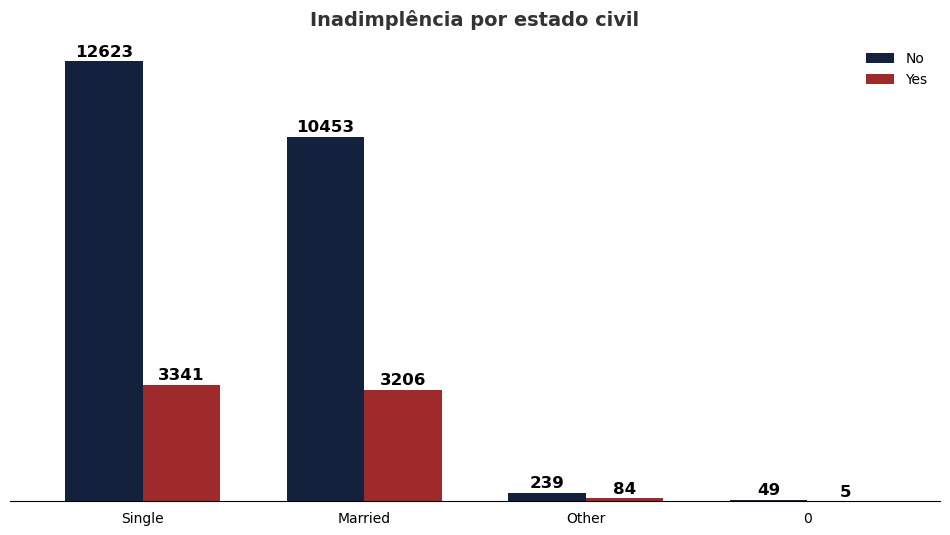

In [27]:
marriage_crstab_plt = (marriage_crstab.sort_values(['No'], ascending = False)
                              .plot(kind='bar', rot = 0, grid=False, width = 0.7, xlabel = '', color = ['#14213d', '#9e2a2b'], figsize=(12, 6)))
configure_bar_chart(marriage_crstab_plt,'Inadimplência por estado civil')

- Os genêros parecem ter níveis similares de inadimplência
- O estado civil também tem nívels similares de inadiplência (há um número de inadimplentes solteiros um pouco maior do que aqueles que são casados).

## Variáveis quantitativas

Vamos observar a distribuição das variáveis quantitativas.

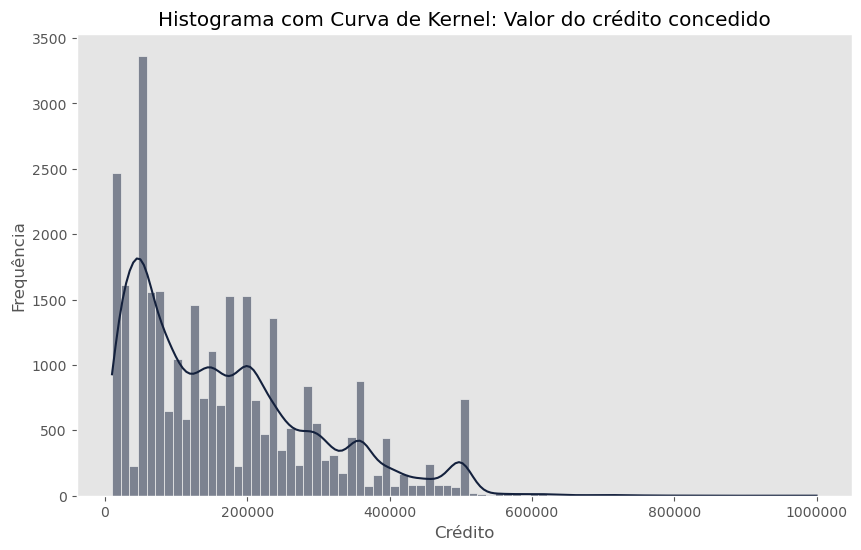

In [28]:
plot_histogram_kde(df['LIMIT_BAL'], 'Histograma com Curva de Kernel: Valor do crédito concedido', 'Crédito', 'Frequência', '#14213d')

A cauda longa sugere alguns outliers, fazendo um boxplot podemos confirmar isso:

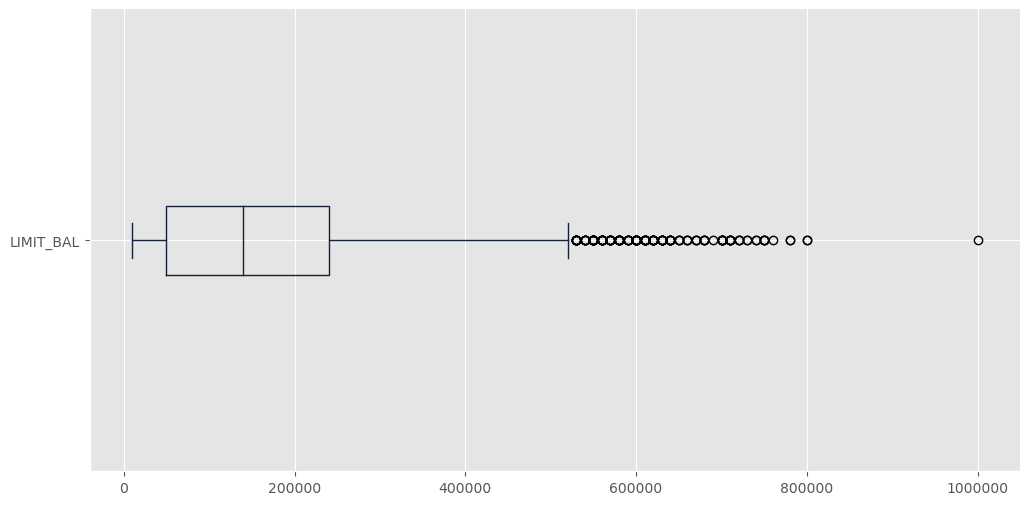

In [29]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    df.boxplot(column=['LIMIT_BAL'], vert=False, color='#14213d')
    ax.ticklabel_format(style='plain', axis='x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

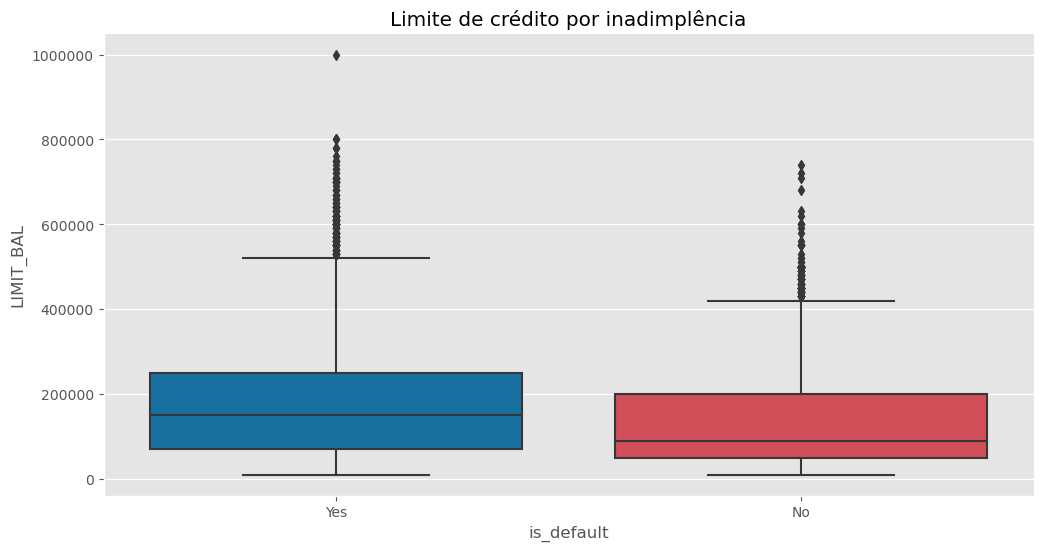

In [30]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='is_default', y='LIMIT_BAL', data=df, palette={0: '#0077b6', 1: '#e63946'})
    
    ax.ticklabel_format(style='plain', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title('Limite de crédito por inadimplência')
    # Substituir os rótulos do eixo x
    ax.set_xticklabels([label_mapping_default[label] for label in df['is_default'].unique()])

plt.show()

- Pessoas que estão inadimplentes tem maior limite de crédito, em média.

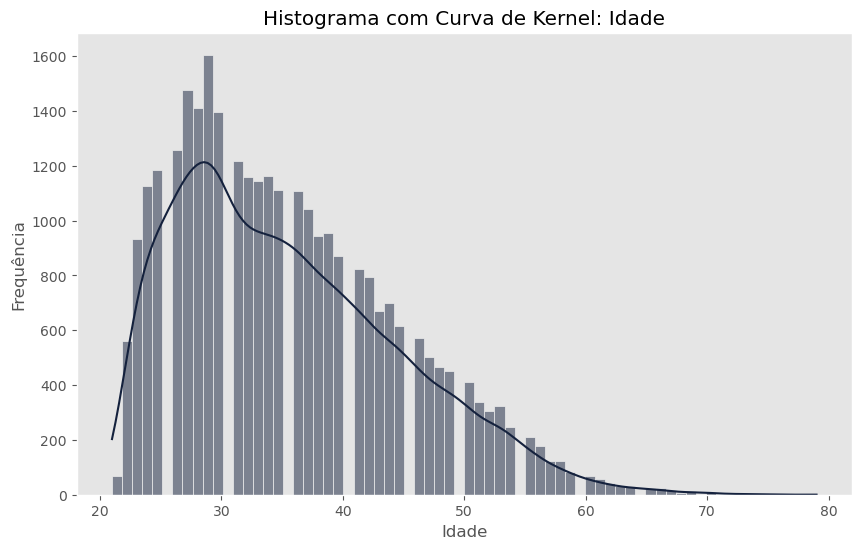

In [31]:
plot_histogram_kde(df['AGE'], 'Histograma com Curva de Kernel: Idade', 'Idade', 'Frequência', '#14213d')

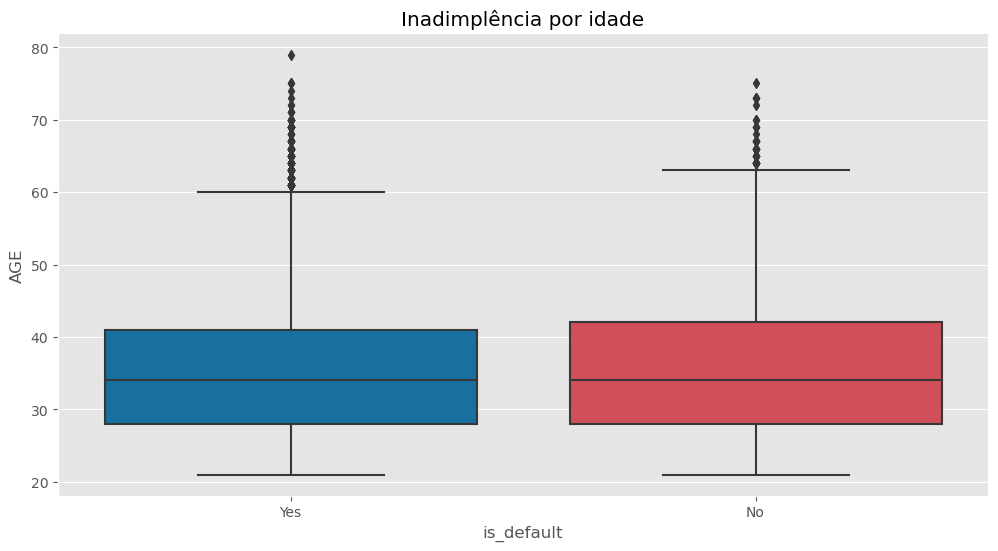

In [32]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='is_default', y='AGE', data=df, palette={0: '#0077b6', 1: '#e63946'})
    
    ax.ticklabel_format(style='plain', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title('Inadimplência por idade')
    # Substituir os rótulos do eixo x
    ax.set_xticklabels([label_mapping_default[label] for label in df['is_default'].unique()])

plt.show()


## Correlação

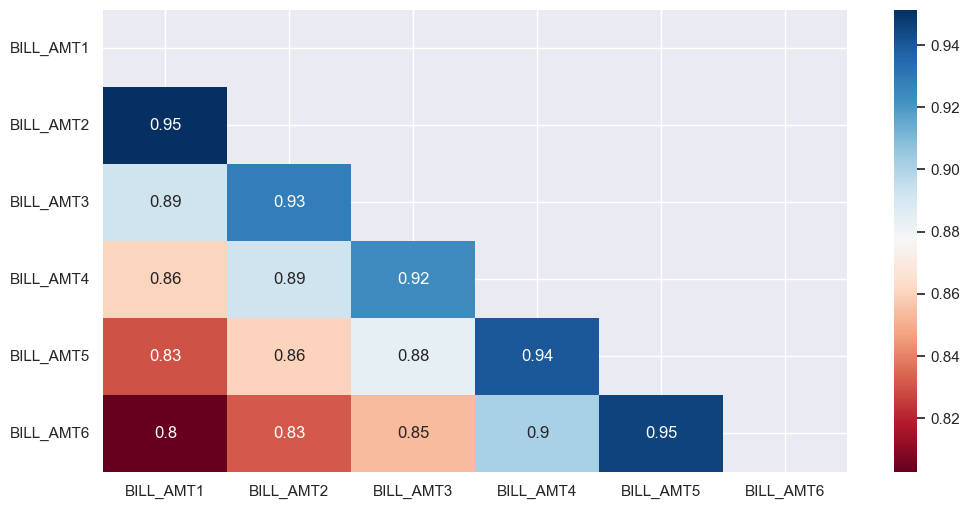

In [33]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
mask = np.triu(np.ones_like(df[var].corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df[var].corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

Acima temos a correlação entre o valor do extrato da fatura entre abril e setembro de 2005.
- Existe forte correlação positiva entre todas as variáveis de extrato da fatura (BILL_AMT1 a BILL_AMT6), com valores de correlação acima de 0.8. Assim, o valor do extrato da fatura em um mês está fortemente associado ao valor do extrato da fatura nos meses subsequentes.
- Quando o valor do extrato da fatura aumenta ou diminui em um mês, tende a aumentar ou diminuir nos meses seguintes.
A correlação entre as variáveis diminui ao longo do tempo, sugerindo que a relação linear entre elas está enfraquecendo com o passar dos meses. Esse padrão se repete para todas as variáveis.

Checamos, agora, o  estado de pagamento entre os meses:

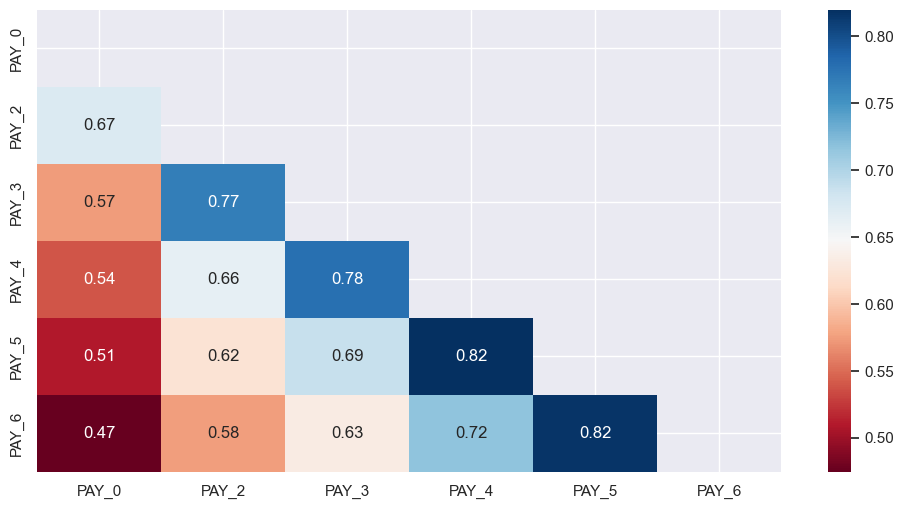

In [34]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
mask = np.triu(np.ones_like(df[var].corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df[var].corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

O padrão se repete, com a correlação diminuindo entre as variáveis conforme o passar do tempo.

Por fim, temos um gráfico de correlação entre valor do pagamento anterior:

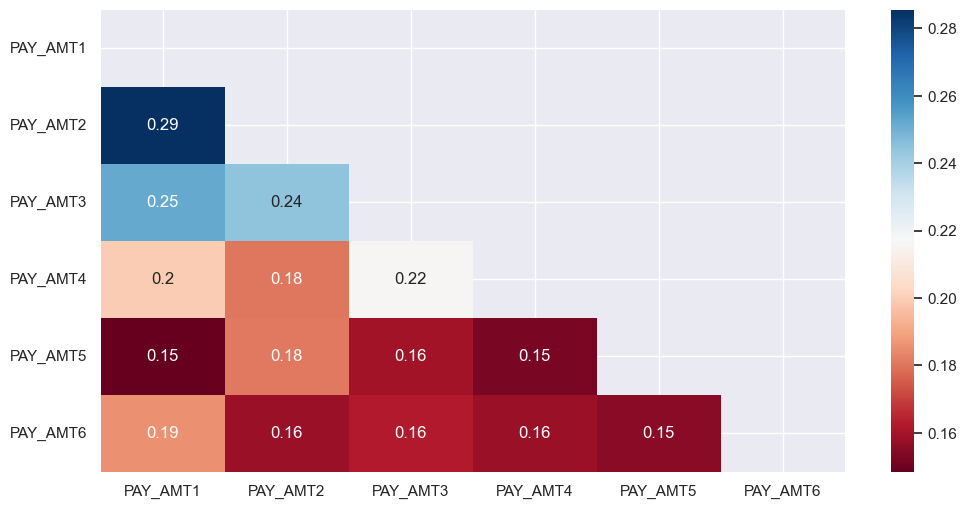

In [35]:
var = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
mask = np.triu(np.ones_like(df[var].corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df[var].corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

- Não há correlação entre o valor pago em um mês e o seguinte.



# Preparação dos dados

Nessa seção eu irei realizar algumas transformações nos dados para prosseguir com o modelo de classificação.

Como foi visto na análise exploratória de dados, ao analisar as distribuições de colunas individuais, temos alguns valores codificados em categorias que não existem no dicionário. Esses valores são valores faltantes em potencial, que estavam rotulados como 'Unknown' ou 0. Para lidar com dados ausentes, podemos optar por descartá-los, desenvolver um modelo de aprendizado de máquina para lidar com eles ou imputá-los com a moda no caso de dados categóricos. Descartar os dados não é aconselhável devido à perda de informações em nosso conjunto de dados já pequeno, e desenvolver um modelo de aprendizado de máquina está fora do escopo do projeto. Felizmente, existe uma categoria de "Other" para todas as variáveis categórias. É nessa categoria que iremos por os dados que não sabemos o verdadeiro rótulo.

Além de imputar o valores dos dados ausentes, também detectou-se na etapa anterior outliers. Irei eliminar os valores mais discrepantes do dataset. Feito isso, irei separar a variável target do resto do dataset, separar os dados entre treino e teste, lidar com as variáveis categóricas através de one hot encoding  e normalizar os dados.
## Limpando outliers




In [36]:
df.shape

(30000, 24)

In [37]:
#outliers  de PAY_AMT
df = df[df['PAY_AMT1'] <= 750000]
df = df[df['PAY_AMT2'] <= 750000]
df = df[df['PAY_AMT3'] <= 750000]
df = df[df['PAY_AMT4'] <= 750000]
df = df[df['PAY_AMT5'] <= 750000]
df = df[df['PAY_AMT6'] <= 750000]

#outliers de LIMIT_BALL
df = df[df['LIMIT_BAL'] <= 750000]

#outliers
df = df[df['BILL_AMT1'] >= -150000]
df = df[df['BILL_AMT2'] >= -150000]
df = df[df['BILL_AMT3'] >= -150000]
df = df[df['BILL_AMT4'] >= -150000]
df = df[df['BILL_AMT5'] >= -150000]
df = df[df['BILL_AMT6'] >= -150000]

In [38]:
df.shape

(29983, 24)

## Recodificando variáveis

- `EDUCATION` é codificada como 1: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown. Ainda assim, existem alguns 0 que não estavam no dicionário, esse valor será substituído por Other, o mesmo será feito com os valores 'Unknown'
- `MARRIAGE` é codificado como 1=casado, 2=solteiro, 3=outros, todo valor diferente desses três será classificado como Other

In [39]:
print(f'Valores de educação por categoria: \n{df["EDUCATION"].value_counts()}')
print('---' * 13)
print(f'Valores de estado civil por categoria: \n{df["MARRIAGE"].value_counts()}')

Valores de educação por categoria: 
University     14026
Graduate       10575
High School     4914
Unknown          331
Other            123
0                 14
Name: EDUCATION, dtype: int64
---------------------------------------
Valores de estado civil por categoria: 
Single     15958
Married    13649
Other        322
0             54
Name: MARRIAGE, dtype: int64


In [40]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 'Other', 'Unknown': 'Other'})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 'Other'})

In [41]:
print(f'Valores de educação por categoria corrigido: \n{df["EDUCATION"].value_counts()}')
print('---' * 17)
print(f'Valores de estado civil por categoria corrigido: \n{df["MARRIAGE"].value_counts()}')

Valores de educação por categoria corrigido: 
University     14026
Graduate       10575
High School     4914
Other            468
Name: EDUCATION, dtype: int64
---------------------------------------------------
Valores de estado civil por categoria corrigido: 
Single     15958
Married    13649
Other        376
Name: MARRIAGE, dtype: int64


## Separando a variável target

In [42]:
y_all = df.loc[:, 'is_default']
X_all = df.drop('is_default', axis = 1)

In [43]:
print(len(X_all))
print(len(y_all))
print(y_all.value_counts(normalize=True))

29983
29983
0    0.778708
1    0.221292
Name: is_default, dtype: float64


## Separando em treino e teste

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_all,y_all, test_size=0.3, random_state=42)

## One Hot Encoding e Normalização

In [45]:
# Separando as variáveis que receberão one hot encoding
onehot_cols = ['SEX','EDUCATION', 'MARRIAGE']
non_onehot_cols = [col for col in x_train.columns if col not in onehot_cols]


steps = Pipeline([
    ('preprocess', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_cols),
        ('normalize', MinMaxScaler(), non_onehot_cols),
    ], remainder='passthrough')),
])

# Aplicando o pipeline aos dados de treinamento
x_train_preprocessed = steps.fit_transform(x_train)
# Aplicando o pipeline aos dados de teste
x_test_preprocessed = steps.transform(x_test)

#Criando datasets com os dados transformados
## obtendo o nome das colunas
original_columns = list(steps.named_steps['preprocess'].named_transformers_['onehot'].get_feature_names_out(onehot_cols)) + non_onehot_cols

#fazendo os dataset
x_train_preprocessed_df = pd.DataFrame(x_train_preprocessed, columns=original_columns)
x_test_preprocessed_df = pd.DataFrame(x_test_preprocessed, columns = original_columns)

# Normalizing a variável target y
y_scaler = MinMaxScaler()
y_train_preprocessed = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_preprocessed = y_scaler.transform(y_test.values.reshape(-1, 1))

In [46]:
x_train_preprocessed_df.head(3)

,SEX_Male,EDUCATION_High School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Other,MARRIAGE_Single,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,0.0,0.0,0.0,0.0,1.0,0.472973,0.241379,0.1,0.2,0.2,0.1,0.222222,0.2,0.025230,0.093603,0.086504,0.107617,0.084495,0.119090,0.014814,0.005168,0.045183,0.012429,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,1.0,0.108108,0.103448,0.2,0.2,0.2,0.4,0.222222,0.2,0.078301,0.135691,0.137348,0.130197,0.094458,0.152333,0.012345,0.006221,0.000496,0.000481,0.000000,0.003794
2,1.0,0.0,0.0,1.0,0.0,1.0,0.027027,0.155172,0.1,0.2,0.2,0.2,0.222222,0.2,0.064536,0.120982,0.120757,0.123619,0.088464,0.147927,0.003950,0.002584,0.002494,0.002314,0.002345,0.001897


In [47]:
x_test_preprocessed_df.head(3)

,SEX_Male,EDUCATION_High School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Other,MARRIAGE_Single,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,0.0,0.0,1.0,0.0,1.0,0.081081,0.017241,0.2,0.2,0.2,0.2,0.222222,0.2,0.060034,0.119449,0.119146,0.121990,0.094270,0.157354,0.007452,0.002584,0.002494,0.002316,0.002792,0.001897
1,1.0,0.0,0.0,0.0,0.0,0.0,0.621622,0.327586,0.3,0.4,0.2,0.2,0.222222,0.2,0.437165,0.382097,0.352128,0.280326,0.218008,0.256389,0.012380,0.017228,0.013003,0.010414,0.011723,0.007967
2,0.0,0.0,0.0,1.0,0.0,1.0,0.162162,0.172414,0.2,0.2,0.2,0.2,0.222222,0.2,0.165477,0.205618,0.212969,0.217754,0.178835,0.252266,0.011358,0.006891,0.013218,0.008562,0.008440,0.007019


In [48]:
x_train_preprocessed

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.24291301e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.81336635e-04, 0.00000000e+00, 3.79403691e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.31411844e-03, 2.34450647e-03, 1.89701846e-03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.47117765e-02, 3.51675970e-02, 1.89701846e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.09941453e-03, 1.75837985e-02, 6.63956460e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.91921413e-04, 0.00000000e+00, 0.00000000e+00]])

In [49]:
y_train_preprocessed

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [50]:
y_train_preprocessed = y_train_preprocessed.reshape(-1)
y_test_preprocessed = y_test_preprocessed.reshape(-1)

In [51]:
y_train_preprocessed

array([0., 0., 0., ..., 0., 0., 0.])

# Modelos de Machine Learning

In [66]:
def cross_validation(model, X, y, oversampling=False):
    # Scikit-learn K-Fold
    kfold = StratifiedKFold(n_splits=5)

    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    fold_rocs = []
    

    for idx, (idx_train, idx_validation) in enumerate(kfold.split(X, y)):
        X_train_split = X[idx_train, :]
        y_train_split = y[idx_train]

        if oversampling:
            sm = SMOTE(random_state=42)
            X_train_split, y_train_split = sm.fit_resample(X_train_split, y_train_split)

        model.fit(X_train_split, y_train_split)

        X_validation_split = X[idx_validation, :]
        y_validation_split = y[idx_validation]

        predictions = model.predict(X_validation_split)

        fold_accuracy = accuracy_score(y_validation_split, predictions)
        fold_precision = precision_score(y_validation_split, predictions)
        fold_recall = recall_score(y_validation_split, predictions)
        fold_f1 = f1_score(y_validation_split, predictions)
        fold_roc_auc_score = roc_auc_score(y_validation_split, predictions)

        fold_accuracies.append(fold_accuracy)
        fold_precisions.append(fold_precision)
        fold_recalls.append(fold_recall)
        fold_f1s.append(fold_f1)
        fold_rocs.append(fold_roc_auc_score)
    

    print(f'Média acurácia: {np.mean(fold_accuracies)}')
    print(f'Média precisão: {np.mean(fold_precisions)}')
    print(f'Média recall: {np.mean(fold_recalls)}')
    print(f'Média F1-score: {np.mean(fold_f1s)}')
    print(f'Média AUC score: {np.mean(fold_rocs)}')

    return fold_accuracies, fold_precisions, fold_recalls, fold_f1s, fold_rocs

In [72]:
models = [LogisticRegression(max_iter=10000),  DecisionTreeClassifier(), RandomForestClassifier(), xgb.XGBClassifier()]
print('Sem o SMOTE')
print('------------------------------------------------------------')
for model in models:
    print(f'Cross-validation para {type(model).__name__}:')
    cross_validation(model, x_train_preprocessed, y_train_preprocessed, oversampling=False)
    print('------------------------------------------------------------')

Sem o SMOTE
------------------------------------------------------------
Cross-validation para LogisticRegression:
Média acurácia: 0.8048884937095769
Média precisão: 0.7035848248758085
Média recall: 0.21349036402569593
Média F1-score: 0.3272657900537994
Média AUC score: 0.5938145328147685
------------------------------------------------------------
Cross-validation para DecisionTreeClassifier:
Média acurácia: 0.7209834652420233
Média precisão: 0.3795388811589314
Média recall: 0.4002141327623126
Média F1-score: 0.38955865747395635
Média AUC score: 0.6064986193247364
------------------------------------------------------------
Cross-validation para RandomForestClassifier:
Média acurácia: 0.8121783374158564
Média precisão: 0.6397938426570118
Média recall: 0.3578158458244111
Média F1-score: 0.4587619026638376
Média AUC score: 0.650013263991328
------------------------------------------------------------
Cross-validation para XGBClassifier:
Média acurácia: 0.809653189288885
Média precisão: 

In [73]:
models = [LogisticRegression(max_iter=10000),  DecisionTreeClassifier(), RandomForestClassifier(), xgb.XGBClassifier()]
print('Com o SMOTE')
print('------------------------------------------------------------')
for model in models:
    print(f'Cross-validation para {type(model).__name__}:')
    cross_validation(model, x_train_preprocessed, y_train_preprocessed, oversampling=True)
    print('------------------------------------------------------------')

Com o SMOTE
------------------------------------------------------------
Cross-validation para LogisticRegression:
Média acurácia: 0.6695729827210457
Média precisão: 0.3656516252735965
Média recall: 0.6597430406852248
Média F1-score: 0.4704929169058234
Média AUC score: 0.6660644747692498
------------------------------------------------------------
Cross-validation para DecisionTreeClassifier:
Média acurácia: 0.6977324032922175
Média precisão: 0.3568344807096372
Média recall: 0.44668094218415416
Média F1-score: 0.3966900851197722
Média AUC score: 0.6081305340679263
------------------------------------------------------------
Cross-validation para RandomForestClassifier:
Média acurácia: 0.7931676054823977
Média precisão: 0.5419024690293951
Média recall: 0.45845824411134906
Média F1-score: 0.4965495328894306
Média AUC score: 0.6737074305411894
------------------------------------------------------------
Cross-validation para XGBClassifier:
Média acurácia: 0.8033639468651069
Média precisão

In [112]:
def cross_validation_roc(model, X, y, oversampling=False):
    # Scikit-learn K-Fold
    kfold = StratifiedKFold(n_splits=5)

    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_rocs = []
    fold_fprs = []
    fold_tprs = []

    for idx, (idx_train, idx_validation) in enumerate(kfold.split(X, y)):
        X_train_split = X[idx_train, :]
        y_train_split = y[idx_train]


        if oversampling:
            sm = SMOTE(random_state=42)
            X_train_split, y_train_split = sm.fit_resample(X_train_split, y_train_split)

        model.fit(X_train_split, y_train_split)

        X_validation_split = X[idx_validation, :]
        y_validation_split = y[idx_validation]

        predictions = model.predict(X_validation_split)

        fold_accuracy = accuracy_score(y_validation_split, predictions)
        fold_precision = precision_score(y_validation_split, predictions)
        fold_recall = recall_score(y_validation_split, predictions)
        fold_roc_auc_score = roc_auc_score(y_validation_split, predictions)
        fpr, tpr, _ = roc_curve(y_validation_split, predictions)
        
        fold_fprs.append(fpr)
        fold_tprs.append(tpr)
        fold_accuracies.append(fold_accuracy)
        fold_precisions.append(fold_precision)
        fold_recalls.append(fold_recall)
        fold_rocs.append(fold_roc_auc_score)
    

    print(f'Média acurácia: {np.mean(fold_accuracies)}')
    print(f'Média precisão: {np.mean(fold_precisions)}')
    print(f'Média recall: {np.mean(fold_recalls)}')
    print(f'Média AUC score: {np.mean(fold_rocs)}')

    return fold_accuracies, fold_precisions, fold_recalls,   fold_rocs, fold_fprs, fold_tprs


Cross-validation para LogisticRegression:
Média acurácia: 0.6695729827210457
Média precisão: 0.3656516252735965
Média recall: 0.6597430406852248
Média AUC score: 0.6660644747692498


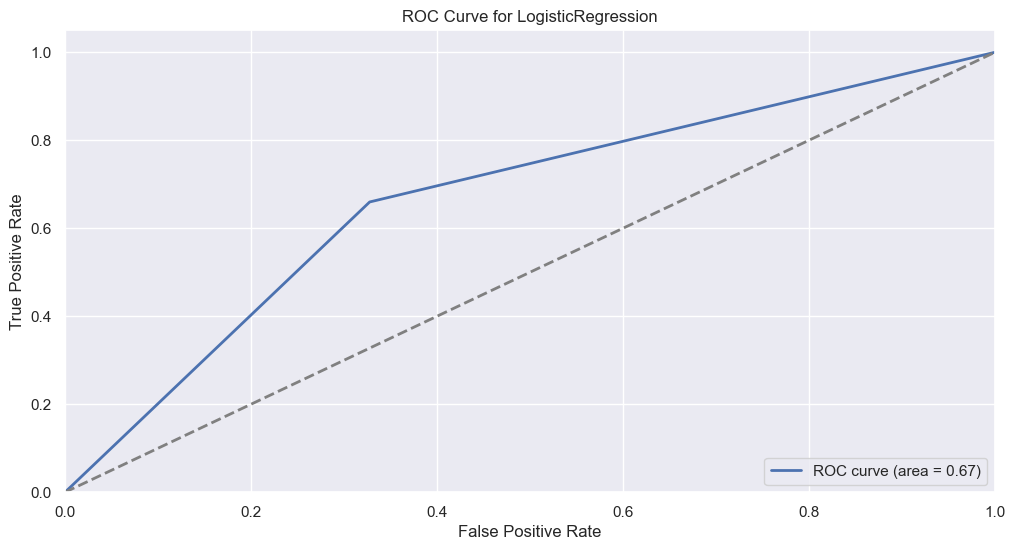

Cross-validation para DecisionTreeClassifier:
Média acurácia: 0.6965410307482726
Média precisão: 0.35343131828121693
Média recall: 0.4385438972162741
Média AUC score: 0.6044602020048068


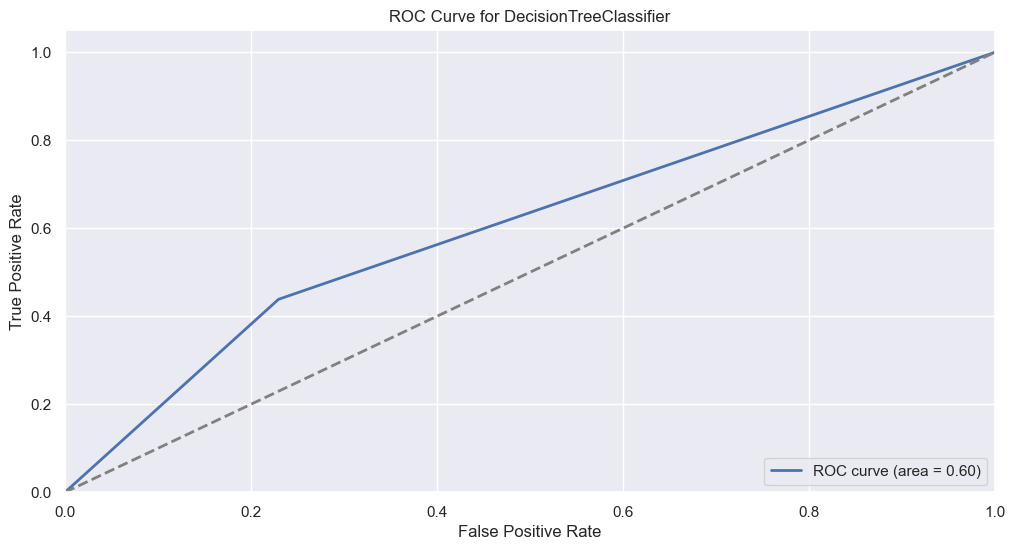

Cross-validation para RandomForestClassifier:
Média acurácia: 0.7936437503909131
Média precisão: 0.543247802312859
Média recall: 0.4593147751605996
Média AUC score: 0.674319435091612


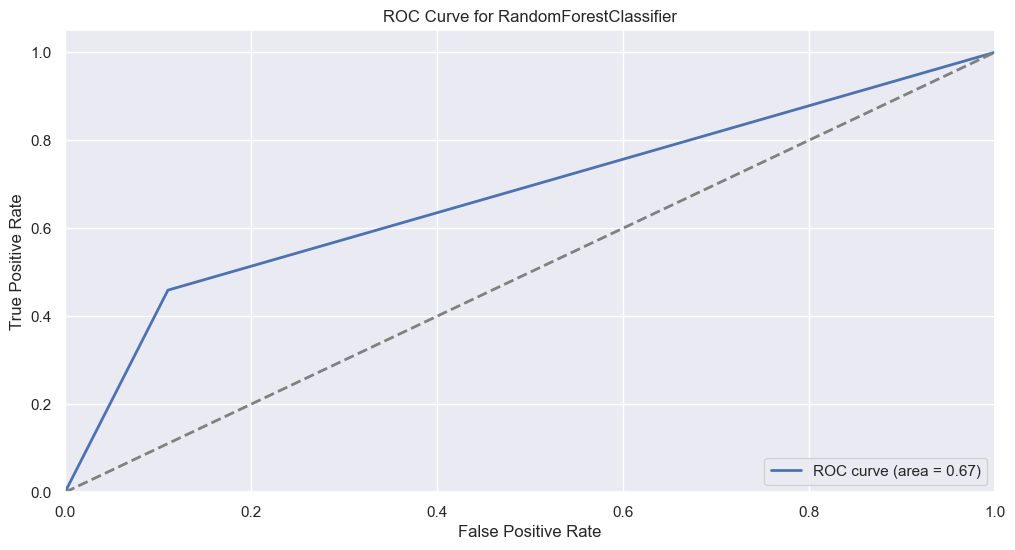

Cross-validation para XGBClassifier:
Média acurácia: 0.8033639468651069
Média precisão: 0.5883622309359883
Média recall: 0.38865096359743034
Média AUC score: 0.65534999235378


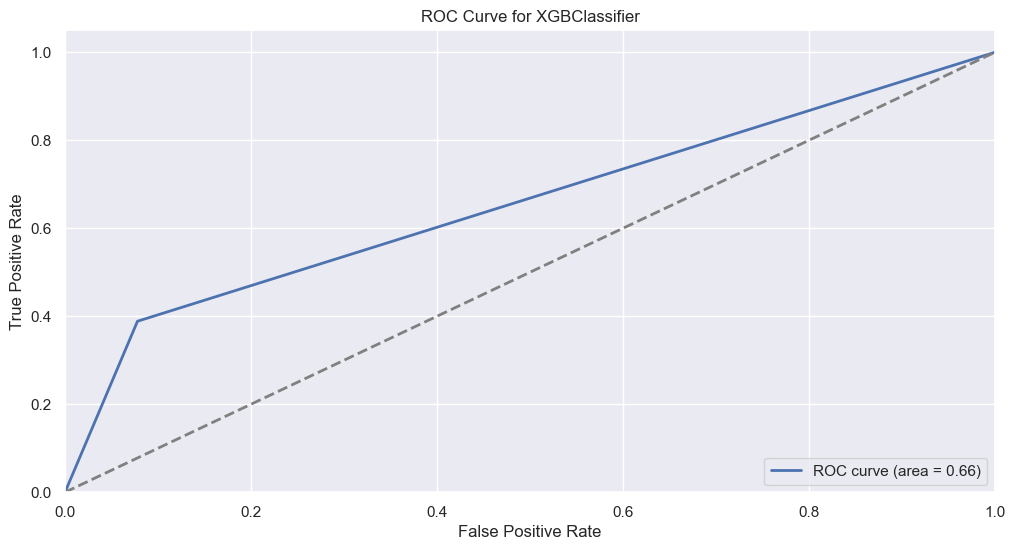

In [113]:
for model in models:
    print(f'Cross-validation para {type(model).__name__}:')
    fold_accuracies, fold_precisions, fold_recalls, fold_rocs, fold_fprs, fold_tprs = cross_validation_roc(model, x_train_preprocessed, y_train_preprocessed, oversampling=True)

    mean_fpr = np.mean(fold_fprs, axis=0)
    mean_tpr = np.mean(fold_tprs, axis=0)

    plt.figure()
    plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % np.mean(fold_rocs))
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {type(model).__name__}')
    plt.legend(loc='lower right')
    plt.show()
